In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [4]:
#creating sample data
X = torch.linspace(0,10,100).reshape(-1,1)
Y = 2*X + 1 + 0.5 * torch.randn(X.size())

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)  # input_dim=1, output_dim=1

    def forward(self,x):
        return self.linear(x)
    
model = LinearRegressionModel()

In [8]:
criterion = nn.MSELoss() #mean squared error
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [9]:
#training

epochs = 100
for epoch in range(epochs):
    model.train()

    #forward pass
    predictions = model(X)
    loss = criterion(predictions,Y)

    #backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



    if(epoch+1)%10 == 0:
        print(f"epoch: {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

epoch: 10/100, Loss: 0.1842
epoch: 20/100, Loss: 0.1840
epoch: 30/100, Loss: 0.1838
epoch: 40/100, Loss: 0.1837
epoch: 50/100, Loss: 0.1835
epoch: 60/100, Loss: 0.1834
epoch: 70/100, Loss: 0.1833
epoch: 80/100, Loss: 0.1832
epoch: 90/100, Loss: 0.1831
epoch: 100/100, Loss: 0.1830


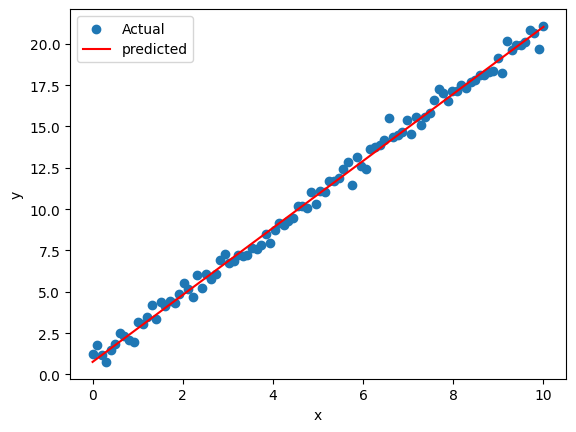

In [10]:
predicted = model(X).detach()
plt.scatter(X.numpy(),Y.numpy(),label='Actual')
plt.plot(X.numpy(),predicted.numpy(),color='red',label='predicted')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#predict new data
x_new = torch.tensor([[12.0]])
y_new = model(x_new).item()
print(f"prediction:{y_new:.2f}")